In [1]:
import pandas as pd

# Load the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Basic exploration
print(train.info())
print(train.describe())

# Check for missing values
missing_values = train.isnull().sum()
print(missing_values[missing_values > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

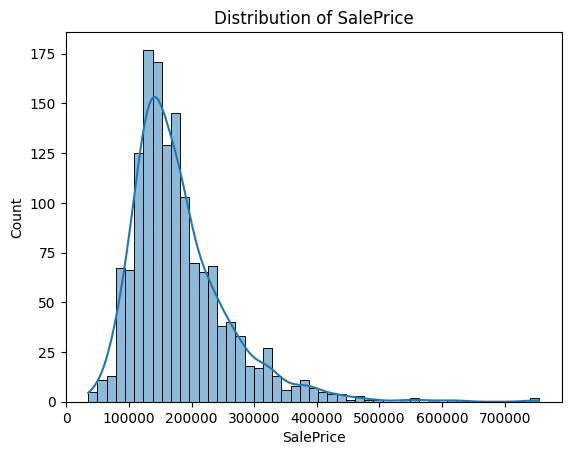

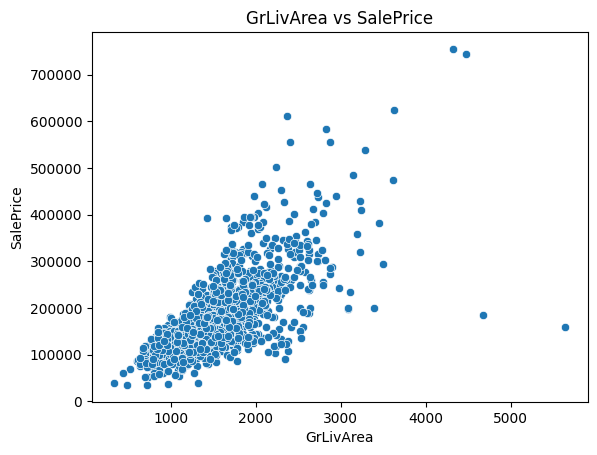

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
sns.histplot(train['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

# Scatter plot for numerical feature
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title("GrLivArea vs SalePrice")
plt.show()



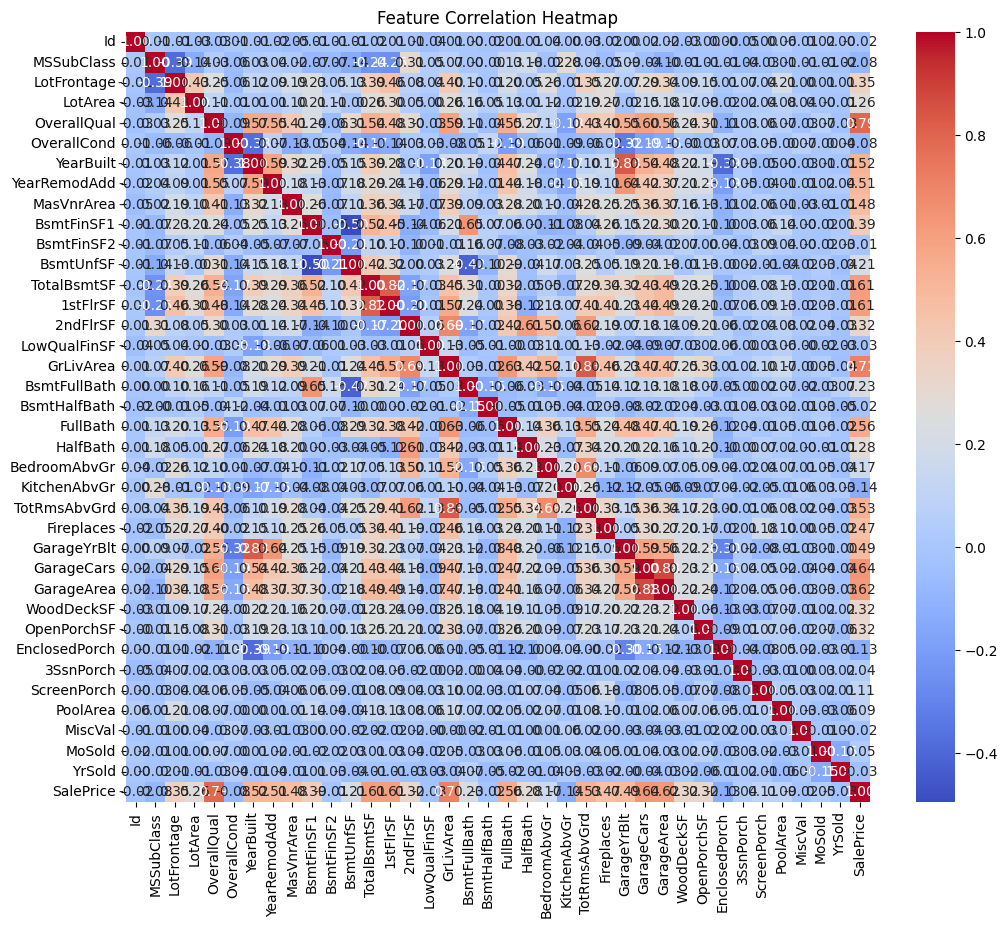

In [4]:
# Filter only numerical columns
numerical_features = train.select_dtypes(include=["float64", "int64"])

# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Combine 'YearBuilt' and 'YearRemodAdd' into 'HouseAge'
train['HouseAge'] = 2025 - train['YearBuilt']  # Replace 2025 with the current year
train['RemodAge'] = 2025 - train['YearRemodAdd']

# Drop irrelevant or redundant features
irrelevant_features = ['Id', 'YearBuilt', 'YearRemodAdd', 'Alley', 'PoolQC']
train = train.drop(columns=irrelevant_features)

# Log transformation for skewed features
train['LotArea'] = np.log1p(train['LotArea'])  # 'log1p' handles zero values safely

# One-hot encode categorical variables
train = pd.get_dummies(train, drop_first=True)

# Feature scaling
scaler = StandardScaler()
numerical_cols = train.select_dtypes(include=["float64", "int64"]).columns
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])

# Split into features and target
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']


In [9]:
print(X, y)

      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0       0.073375    -0.208034 -0.133270     0.651479    -0.517200    0.510015   
1      -0.872563     0.409895  0.113413    -0.071836     2.179628   -0.572835   
2       0.073375    -0.084449  0.420049     0.651479    -0.517200    0.322174   
3       0.309859    -0.414011  0.103317     0.651479    -0.517200   -0.572835   
4       0.073375     0.574676  0.878431     1.374795    -0.517200    1.360826   
...          ...          ...       ...          ...          ...         ...   
1455    0.073375    -0.331620 -0.259231    -0.071836    -0.517200   -0.572835   
1456   -0.872563     0.615871  0.725429    -0.071836     0.381743    0.084610   
1457    0.309859    -0.166839 -0.002359     0.651479     3.078570   -0.572835   
1458   -0.872563    -0.084449  0.136833    -0.795151     0.381743   -0.572835   
1459   -0.872563     0.203918  0.180116    -0.795151     0.381743   -0.572835   

      BsmtFinSF1  BsmtFinSF

In [13]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.impute import SimpleImputer

# Impute missing values for numerical features with the mean
imputer = SimpleImputer(strategy="mean")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)


In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42)
}

# Train and store results
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained successfully.")


Linear Regression trained successfully.
Ridge Regression trained successfully.
Lasso Regression trained successfully.
Decision Tree trained successfully.


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate models
for name, model in trained_models.items():
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")


Linear Regression - RMSE: 0.64, R²: 0.66
Ridge Regression - RMSE: 0.38, R²: 0.88
Lasso Regression - RMSE: 0.43, R²: 0.85
Decision Tree - RMSE: 0.50, R²: 0.80


In [17]:
from sklearn.model_selection import GridSearchCV

# Example: Optimize Ridge Regression
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()

grid_search = GridSearchCV(estimator=ridge, param_grid=ridge_params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
best_ridge = grid_search.best_estimator_
y_pred_best_ridge = best_ridge.predict(X_val)

best_rmse = np.sqrt(mean_squared_error(y_val, y_pred_best_ridge))
best_r2 = r2_score(y_val, y_pred_best_ridge)

print(f"Optimized Ridge - RMSE: {best_rmse:.2f}, R²: {best_r2:.2f}")


Optimized Ridge - RMSE: 0.39, R²: 0.88


# **TESTING THE MODEL**

In [19]:
# Load the test dataset
test = pd.read_csv("test.csv")

# Create the same new features
test['HouseAge'] = 2025 - test['YearBuilt']
test['RemodAge'] = 2025 - test['YearRemodAdd']

# Drop irrelevant or redundant features
test = test.drop(columns=irrelevant_features, errors='ignore')

# Log transform skewed features
if 'LotArea' in test.columns:
    test['LotArea'] = np.log1p(test['LotArea'])

# One-hot encode categorical variables to match training data
test = pd.get_dummies(test)

# Align the test data with the training data to ensure feature consistency
test = test.reindex(columns=X_train.columns, fill_value=0)

# Impute missing values in the test set
test = pd.DataFrame(imputer.transform(test), columns=test.columns)


In [37]:
# Select the best model (e.g., Ridge Regression)
best_model = trained_models["Ridge Regression"]

# Predict on the test data
print(test[:10])
test_predictions = best_model.predict(test)

# Display the predictions
print("Predicted Sale Prices for Test Data:")
print(test_predictions[:10])  # Show first 10 predictions


   MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0        20.0    80.000000  9.360741          5.0          6.0         0.0   
1        20.0    81.000000  9.565775          6.0          6.0       108.0   
2        60.0    74.000000  9.534668          5.0          5.0         0.0   
3        60.0    78.000000  9.208238          6.0          6.0        20.0   
4       120.0    43.000000  8.518392          8.0          5.0         0.0   
5        60.0    75.000000  9.210440          6.0          5.0         0.0   
6        20.0     0.012107  8.984819          6.0          7.0         0.0   
7        60.0    63.000000  9.036344          6.0          5.0         0.0   
8        20.0    85.000000  9.227886          7.0          5.0         0.0   
9        20.0    70.000000  9.036106          4.0          5.0         0.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
0       468.0       144.0      270.0        882.0  ...             

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on validation data
y_val_pred = best_model.predict(X_val)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Data - RMSE: {rmse:.2f}, R²: {r2:.2f}")


Validation Data - RMSE: 0.38, R²: 0.88


# **Creating Frontend For Users**

In [27]:
!pip install streamlit
!pip install pyngrok


In [24]:
import joblib

# Save the model
joblib.dump(best_model, "house_price_model.pkl")
print("Model saved as house_price_model.pkl")


Model saved as house_price_model.pkl


In [34]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the trained model
model = joblib.load("house_price_model.pkl")

# Function to preprocess input data
def preprocess_input(data):
    # Convert the input dictionary to a DataFrame
    data = pd.DataFrame([data])

    # Add new features
    data["HouseAge"] = 2025 - data["YearBuilt"]
    data["RemodAge"] = 2025 - data["YearRemodAdd"]

    # Drop unnecessary columns
    data = data.drop(columns=["YearBuilt", "YearRemodAdd"], errors="ignore")

    # Transform features if necessary
    if "LotArea" in data.columns:
        data["LotArea"] = np.log1p(data["LotArea"])

    # Ensure the DataFrame has the correct columns for the model
    feature_columns = model.feature_names_in_
    data = data.reindex(columns=feature_columns, fill_value=0)

    return data


st.title("House Price Prediction App")
st.write("Enter the details of the house to predict its price.")
lot_area = st.number_input("Lot Area", min_value=1, value=5000, step=100)
year_built = st.number_input("Year Built", min_value=1800, value=2000, step=1)
year_remod = st.number_input("Year Remodeled", min_value=1800, value=2010, step=1)
overall_qual = st.slider("Overall Quality (1 to 10)", min_value=1, max_value=10, value=5)
overall_cond = st.slider("Overall Condition (1 to 10)", min_value=1, max_value=10, value=5)

input_data = {
    "LotArea": lot_area,
    "YearBuilt": year_built,
    "YearRemodAdd": year_remod,
    "OverallQual": overall_qual,
    "OverallCond": overall_cond,
}

if st.button("Predict Price"):
    processed_data = preprocess_input(input_data)
    prediction = model.predict(processed_data)
    st.success(f"The predicted house price is: ${prediction[0]:,.2f}")


Overwriting app.py


In [31]:
!ngrok config add-authtoken 2uWHRPsp7Xi0J5iu6XtKEeOZWmv_6XY65BpChMr6vRa1njuNq

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [35]:
from pyngrok import ngrok

# Start the Streamlit app in the background
!streamlit run app.py &>/content/logs.txt &

# Connect ngrok to the default Streamlit port
public_url = ngrok.connect(8501, "http")
print(f"Streamlit app is live at {public_url}")


Streamlit app is live at NgrokTunnel: "https://9b6d-34-16-159-249.ngrok-free.app" -> "http://localhost:8501"
